# PYTHON LOGISTIC REGRESSION DEMO

### BINARY CLASSIFICATION TASK (LINEAR)

#### TRAINING DATASET

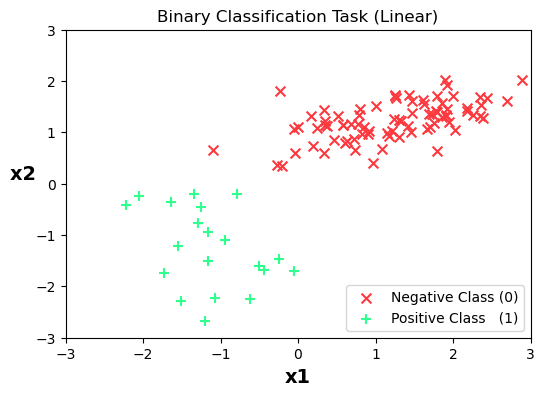

In [40]:
# Create Binary Classification Task
from sklearn.datasets import make_classification
X_train, y_train = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                                       n_classes=2, n_clusters_per_class=1, weights=[0.8,0.2], 
                                       class_sep=1.2, flip_y=0.0, random_state=123)

# Separate Samples
X_0 = X_train[y_train==0] # y=0 -> Red   -> Negative Class
X_1 = X_train[y_train==1] # y=1 -> Green -> Positive Class

# Plot Training Data
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Binary Classification Task (Linear)')
plt.scatter(X_0[:,0], X_0[:,1], color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
plt.scatter(X_1[:,0], X_1[:,1], color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
plt.legend(loc='lower right')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

#### FIT LINEAR MODEL

θ0: [-1.0810513]
θ1, θ2: [[-1.52695632 -2.0530486 ]]


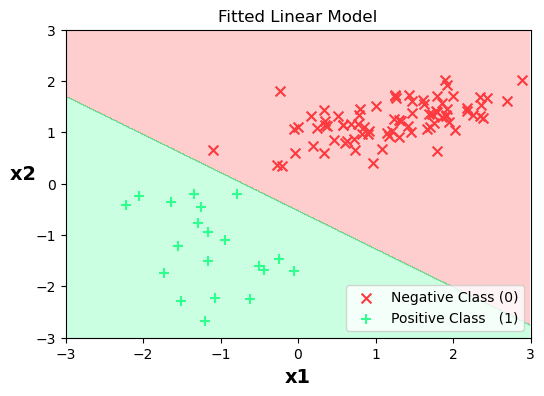

In [41]:
# Fit Logistic Regression Model
# --- f(X) = sig(θ0 + θ1x1 + θ2x2)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True)
model.fit(X_train, y_train)

# Print learned Model Coefficients
print('θ0:', model.intercept_)
print('θ1, θ2:', model.coef_)

# Create Meshgrid of x1, x2 Values
import numpy as np
x1 = np.arange(-3, 3, 0.01)
x2 = np.arange(-3, 3, 0.01)
xx1, xx2 = np.meshgrid(x1, x2)

# Evaluate f(X) on Grid
Z = model.predict(np.c_[xx1.flatten(), xx2.flatten()]).reshape(xx1.shape)

# Plot Decision Boundary
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#FC393E', '#2FFF8D'])

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Fitted Linear Model')
plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
plt.scatter(X_0[:,0], X_0[:,1], color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
plt.scatter(X_1[:,0], X_1[:,1], color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
plt.legend(loc='lower right')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

#### PREDICT NEW SAMPLE X(-2,-1)

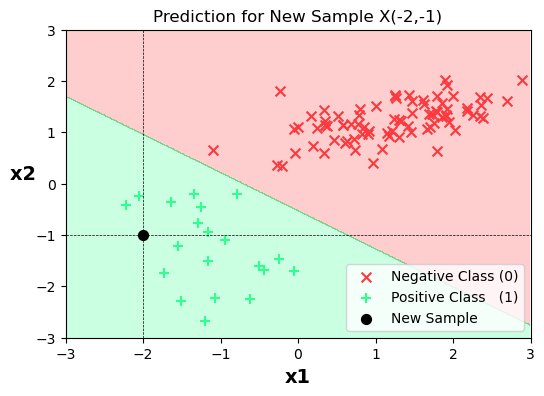

Predicted Class: [1]
Predicted Probability P(y=1): 0.982


In [42]:
# Define Feature Values X
X_new = np.array([-2, -1]).reshape(1,-1)

# Plot New Sample
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#FC393E', '#2FFF8D'])

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Prediction for New Sample X(-2,-1)')
plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
plt.scatter(X_0[:,0], X_0[:,1],     color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
plt.scatter(X_1[:,0], X_1[:,1],     color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
plt.scatter(X_new[0,0], X_new[0,1], color='#000000', marker='o', s=50, alpha=1.0, label='New Sample')
plt.axhline(-1, color='#000000', linestyle='--', linewidth=0.5)
plt.axvline(-2, color='#000000', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# Print Predicted Class
print('Predicted Class:', model.predict(X_new))
print('Predicted Probability P(y=1):', np.round(model.predict_proba(X_new)[0,1], 3))

### BINARY CLASSIFICATION TASK (NON-LINEAR)

#### TRAINING DATSET

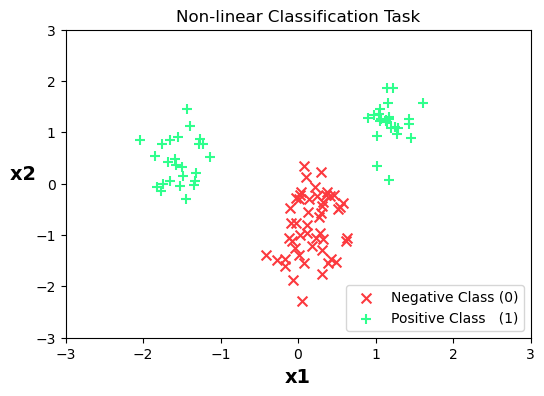

In [79]:
# Create Non-linear Binary Classification Task
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 4, cluster_std = 1.2, random_state = 123)
y = y % 2

# Standardize Features X 
import pandas as pd
from sklearn.preprocessing import StandardScaler 
X_train, y_train = pd.DataFrame(StandardScaler().fit_transform(X)), y
X_train.columns = ['x1', 'x2']

# Add Polynomial Features
X_train['x1_poly'] = X_train['x1']**2
X_train['x2_poly'] = X_train['x2']**2

# Separate Samples
X_0 = X_train[y_train==0] # y=0 -> Red   -> Negative Class
X_1 = X_train[y_train==1] # y=1 -> Green -> Positive Class

# Plot Training Data
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Non-linear Classification Task')
plt.scatter(X_0['x1'], X_0['x2'], color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
plt.scatter(X_1['x1'], X_1['x2'], color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
plt.legend(loc='lower right')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

#### FIT LINEAR MODEL

θ0: [-0.25511495]
θ1, θ2: [[-1.1022755   3.35769527]]


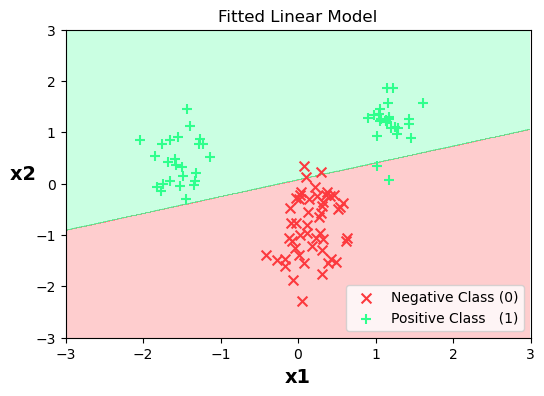

In [80]:
# Fit Logistic Regression Model
# --- f(X) = sig(θ0 + θ1x1 + θ2x2)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True)
model.fit(X_train[['x1','x2']], y_train)

# Print learned Model Coefficients
print('θ0:', model.intercept_)
print('θ1, θ2:', model.coef_)

# Create Meshgrid of x1, x2 Values
import numpy as np
x1 = np.arange(-3, 3, 0.01)
x2 = np.arange(-3, 3, 0.01)
xx1, xx2 = np.meshgrid(x1, x2)

# Evaluate f(X) on Grid
Z = model.predict(np.c_[xx1.flatten(), xx2.flatten()]).reshape(xx1.shape)

# Plot Decision Boundary
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#FC393E', '#2FFF8D'])

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Fitted Linear Model')
plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
plt.scatter(X_0['x1'], X_0['x2'], color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
plt.scatter(X_1['x1'], X_1['x2'], color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
plt.legend(loc='lower right')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

#### PREDICT NEW SAMPLE X(0.25/0.5)

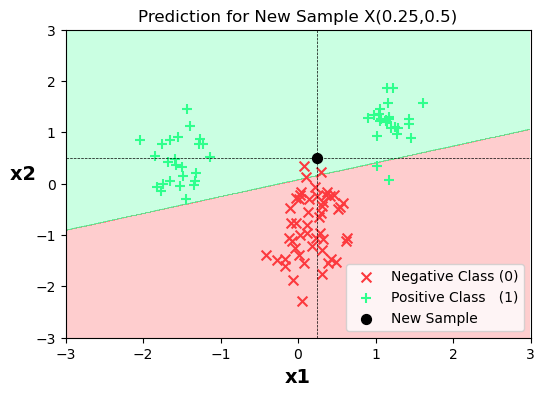

Predicted Class: [1]
Predicted Probability P(y=1): 0.759


In [81]:
# Define Feature Values X
X_new = np.array([0.25, 0.5]).reshape(1,-1)

# Plot New Sample
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#FC393E', '#2FFF8D'])

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Prediction for New Sample X(0.25,0.5)')
plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
plt.scatter(X_0['x1'], X_0['x2'],   color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
plt.scatter(X_1['x1'], X_1['x2'],   color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
plt.scatter(X_new[0,0], X_new[0,1], color='#000000', marker='o', s=50, alpha=1.0, label='New Sample')
plt.axhline(0.50, color='#000000', linestyle='--', linewidth=0.5)
plt.axvline(0.25, color='#000000', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# Print Predicted Class
print('Predicted Class:', model.predict(X_new))
print('Predicted Probability P(y=1):', np.round(model.predict_proba(X_new)[0,1], 3))

#### FIT NON-LINEAR MODEL

θ0: [-2.50339793]
θ1, θ2, θ3, θ4: [[-0.08920655  1.87709602  2.55857731  0.30627606]]


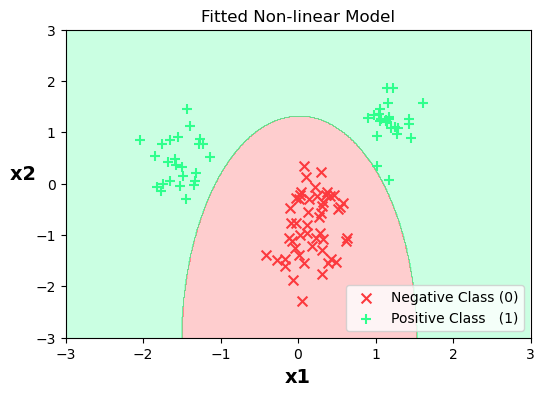

In [82]:
# Fit Logistic Regression Model
# --- f(X) = sig(θ0 + θ1x1 + θ2x2 + θ3x1^2 + θ4x2^2)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True)
model.fit(X_train, y_train)

# Print learned Model Coefficients
print('θ0:', model.intercept_)
print('θ1, θ2, θ3, θ4:', model.coef_)

# Create Meshgrid of x1, x2 Values
import numpy as np
x1 = np.arange(-3, 3, 0.01)
x2 = np.arange(-3, 3, 0.01)
xx1, xx2 = np.meshgrid(x1, x2)

# Evaluate f(X) on Grid
Z = np.where(
             (model.intercept_ 
              + model.coef_[0,0]*xx1 
              + model.coef_[0,1]*xx2 
              + model.coef_[0,2]*(xx1**2) 
              + model.coef_[0,3]*(xx2**2) > 0.5),
             1,
             0)

# Plot Decision Boundary
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#FC393E', '#2FFF8D'])

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Fitted Non-linear Model')
plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
plt.scatter(X_0['x1'], X_0['x2'], color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
plt.scatter(X_1['x1'], X_1['x2'], color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
plt.legend(loc='lower right')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

#### PREDICT NEW SAMPLE X(0.25/0.5)

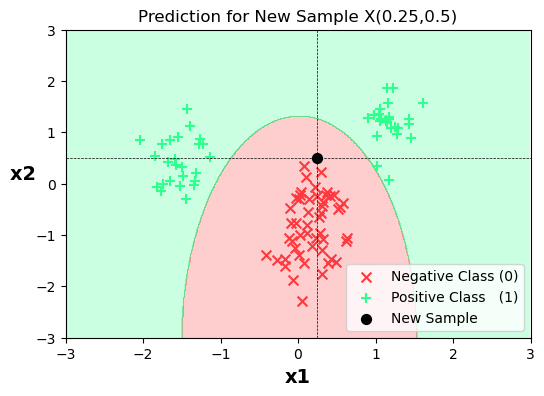

Predicted Class: [0]
Predicted Probability P(y=0): 0.794
Predicted Probability P(y=1): 0.206


In [83]:
# Define Feature Values X
X_new = np.array([0.25, 0.5, 0.25**2, 0.5**2]).reshape(1,-1)

# Plot New Sample
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#FC393E', '#2FFF8D'])

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Prediction for New Sample X(0.25,0.5)')
plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
plt.scatter(X_0['x1'], X_0['x2'],   color='#FC393E', marker='x', s=50, alpha=1.0, label='Negative Class (0)')
plt.scatter(X_1['x1'], X_1['x2'],   color='#2FFF8D', marker='+', s=50, alpha=1.0, label='Positive Class   (1)')
plt.scatter(X_new[0,0], X_new[0,1], color='#000000', marker='o', s=50, alpha=1.0, label='New Sample')
plt.axhline(0.50, color='#000000', linestyle='--', linewidth=0.5)
plt.axvline(0.25, color='#000000', linestyle='--', linewidth=0.5)
plt.legend(loc='lower right')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# Print Predicted Class
print('Predicted Class:', model.predict(X_new))
print('Predicted Probability P(y=0):', np.round(model.predict_proba(X_new)[0,0], 3))
print('Predicted Probability P(y=1):', np.round(model.predict_proba(X_new)[0,1], 3))

### MULTICLASS CLASSIFICATION TASK

#### TRAINING DATASET

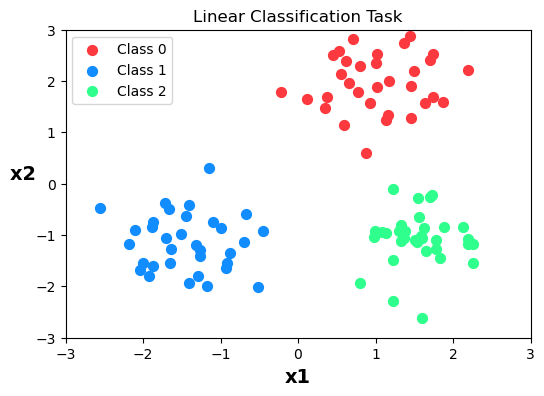

In [96]:
# Create Linear Binary Classification Task
from sklearn.datasets import make_blobs
centers = [[1, 2], [-1.5, -1], [1.5, -1]]
X_train, y_train = make_blobs(n_samples=100, n_features=2, centers=centers, cluster_std=0.5, random_state=123)

# Separate Samples
X_0 = X_train[y_train==0] # y=0 -> Red Class
X_1 = X_train[y_train==1] # y=1 -> Blue Class
X_2 = X_train[y_train==2] # y=2 -> Green Class

# Plot Training Data
import matplotlib.pyplot as plt

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Linear Classification Task')
plt.scatter(X_0[:,0], X_0[:,1], color='#FC393E', marker='o', s=50, alpha=1.0, label='Class 0')
plt.scatter(X_1[:,0], X_1[:,1], color='#118DFF', marker='o', s=50, alpha=1.0, label='Class 1') 
plt.scatter(X_2[:,0], X_2[:,1], color='#2FFF8D', marker='o', s=50, alpha=1.0, label='Class 2')
plt.legend(loc='upper left')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

#### FIT LINEAR MODEL

Model for Red Class vs. Rest
θ0: -1.7488443834739424
θ1, θ2: [0.34897514 2.70132618]

Model for Blue Class vs. Rest
θ0: -0.8818860682190901
θ1, θ2: [-2.64904931 -0.84549531]

Model for Green Class vs. Rest
θ0: -3.0264287649599377
θ1, θ2: [ 2.57341159 -1.98280144]



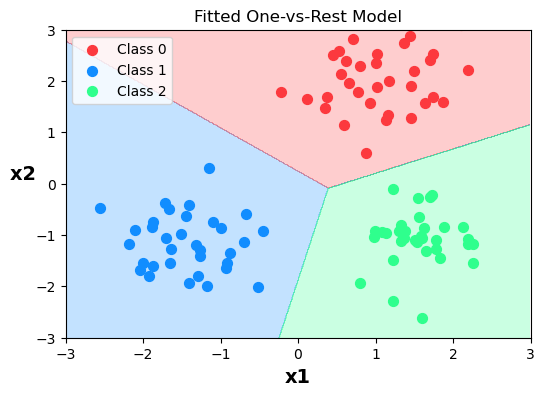

In [97]:
# Fit One-vs-Rest Logistic Regression Model
# --- f_red(X)   = sig(θ0 + θ1x1 + θ2x2)
# --- f_blue(X)  = sig(θ0 + θ1x1 + θ2x2)
# --- f_green(X) = sig(θ0 + θ1x1 + θ2x2)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True, multi_class='ovr')
model.fit(X_train, y_train)

# Print learned Model Coefficients
print('Model for Red Class vs. Rest')
print('θ0:', model.intercept_[0])
print('θ1, θ2:', model.coef_[0])
print('')
print('Model for Blue Class vs. Rest')
print('θ0:', model.intercept_[1])
print('θ1, θ2:', model.coef_[1])
print('')
print('Model for Green Class vs. Rest')
print('θ0:', model.intercept_[2])
print('θ1, θ2:', model.coef_[2])
print('')

# Create Meshgrid of x1, x2 Values
import numpy as np
x1 = np.arange(-3, 3, 0.01)
x2 = np.arange(-3, 3, 0.01)
xx1, xx2 = np.meshgrid(x1, x2)

# Evaluate f(X) on Grid
Z = model.predict(np.c_[xx1.flatten(), xx2.flatten()]).reshape(xx1.shape)

# Plot Decision Boundary
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#FC393E', '#118DFF', '#2FFF8D'])

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Fitted One-vs-Rest Model')
plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
plt.scatter(X_0[:,0], X_0[:,1], color='#FC393E', marker='o', s=50, alpha=1.0, label='Class 0')
plt.scatter(X_1[:,0], X_1[:,1], color='#118DFF', marker='o', s=50, alpha=1.0, label='Class 1') 
plt.scatter(X_2[:,0], X_2[:,1], color='#2FFF8D', marker='o', s=50, alpha=1.0, label='Class 2')
plt.legend(loc='upper left')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

#### PREDICT NEW SAMPLE X(2/-2)

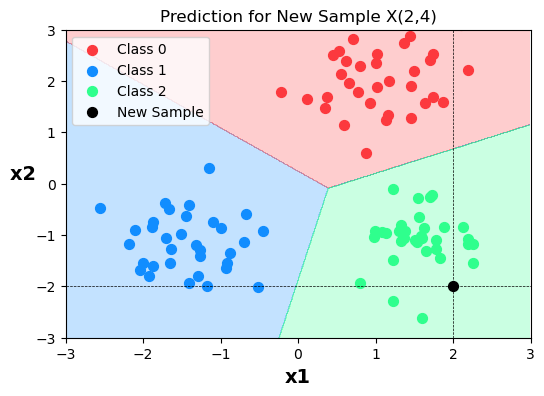

Predicted Class: [2]
Predicted Probability P(y=0): 0.002
Predicted Probability P(y=1): 0.011
Predicted Probability P(y=2): 0.987


In [98]:
# Define Feature Values X
X_new = np.array([2, -2]).reshape(1,-1)

# Plot New Sample
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#FC393E', '#118DFF', '#2FFF8D'])

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(6,4))
plt.title('Prediction for New Sample X(2,4)')
plt.contourf(xx1, xx2, Z, alpha=0.25, cmap=cmap)
plt.scatter(X_0[:,0], X_0[:,1], color='#FC393E', marker='o', s=50, alpha=1.0, label='Class 0')
plt.scatter(X_1[:,0], X_1[:,1], color='#118DFF', marker='o', s=50, alpha=1.0, label='Class 1') 
plt.scatter(X_2[:,0], X_2[:,1], color='#2FFF8D', marker='o', s=50, alpha=1.0, label='Class 2')
plt.scatter(X_new[0,0], X_new[0,1], color='#000000', marker='o', s=50, alpha=1.0, label='New Sample')
plt.axhline(-2, color='#000000', linestyle='--', linewidth=0.5)
plt.axvline( 2, color='#000000', linestyle='--', linewidth=0.5)
plt.legend(loc='upper left')
plt.xlabel("x1",   fontsize=14, weight='bold')
plt.ylabel("x2  ", fontsize=14, weight='bold', rotation='horizontal')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

# Print Predicted Class
print('Predicted Class:', model.predict(X_new))
print('Predicted Probability P(y=0):', np.round(model.predict_proba(X_new)[0,0], 3))
print('Predicted Probability P(y=1):', np.round(model.predict_proba(X_new)[0,1], 3))
print('Predicted Probability P(y=2):', np.round(model.predict_proba(X_new)[0,2], 3))